# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("C:\\Users\\lutol\\Desktop\\Projects\\BA\\data\\customer_booking.csv", encoding="ISO-8859-1")


In [3]:
#The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [5]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [6]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [7]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [8]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [9]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


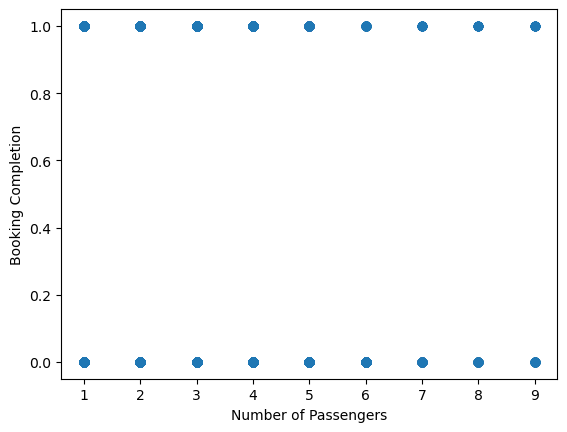

In [10]:
import matplotlib.pyplot as plt

plt.scatter(df['num_passengers'], df['booking_complete'])
plt.xlabel('Number of Passengers')
plt.ylabel('Booking Completion')
plt.show()


In [ ]:
# The plot above shows there is no relationship between the Booking completion and Number of Passegers.

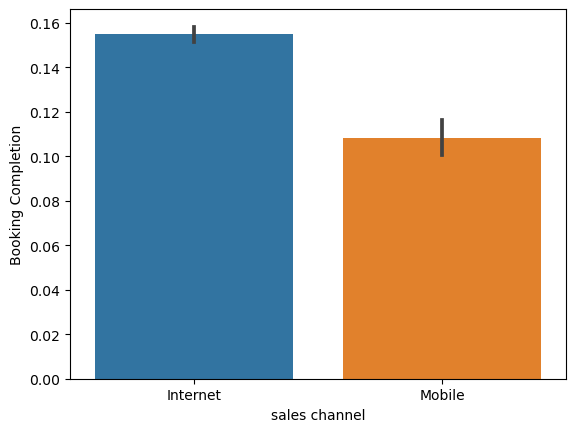

In [11]:
import seaborn as sns

sns.barplot(x='sales_channel', y='booking_complete', data=df)
plt.xlabel('sales channel')
plt.ylabel('Booking Completion')
plt.show()


In [ ]:
This plot shows there are more booking completions on the Internet than on Mobile Channels.

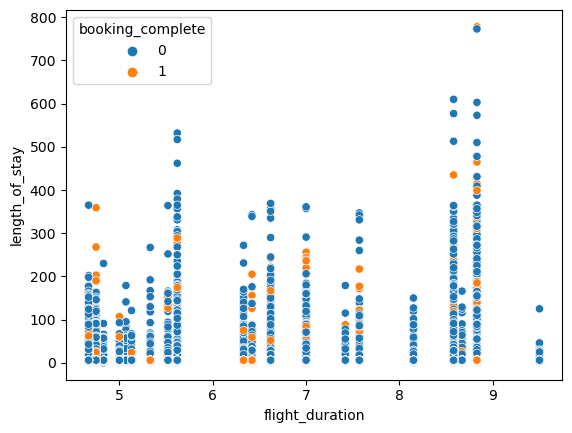

In [12]:
sns.scatterplot(x='flight_duration', y='length_of_stay', hue='booking_complete', data=df)
plt.show()


In [ ]:
# From the plot above we see there is a relationship between Length of Stay and Flight duration in determining booking completion
# Most bookings are 300 days length of stay or less, or 4.5 to 7.5 hour flight duration.

C:\Users\lutol\AppData\Local\Temp\ipykernel_44320\482391955.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


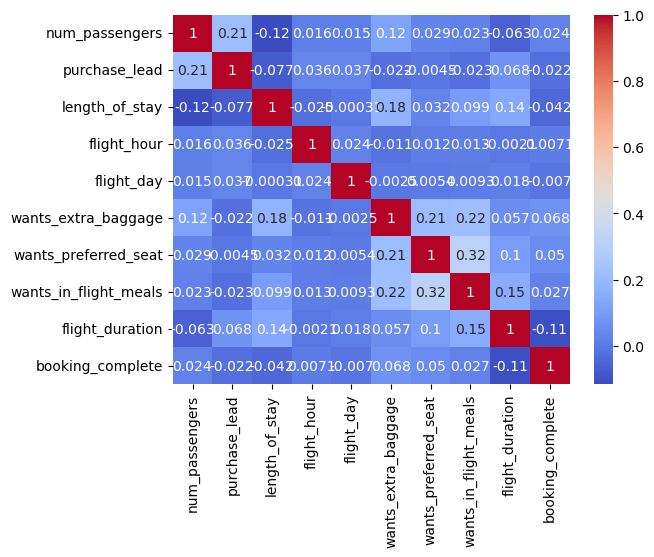

In [13]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


In [ ]:
# The plot above shows the correlation of all the variables with respect to other variables

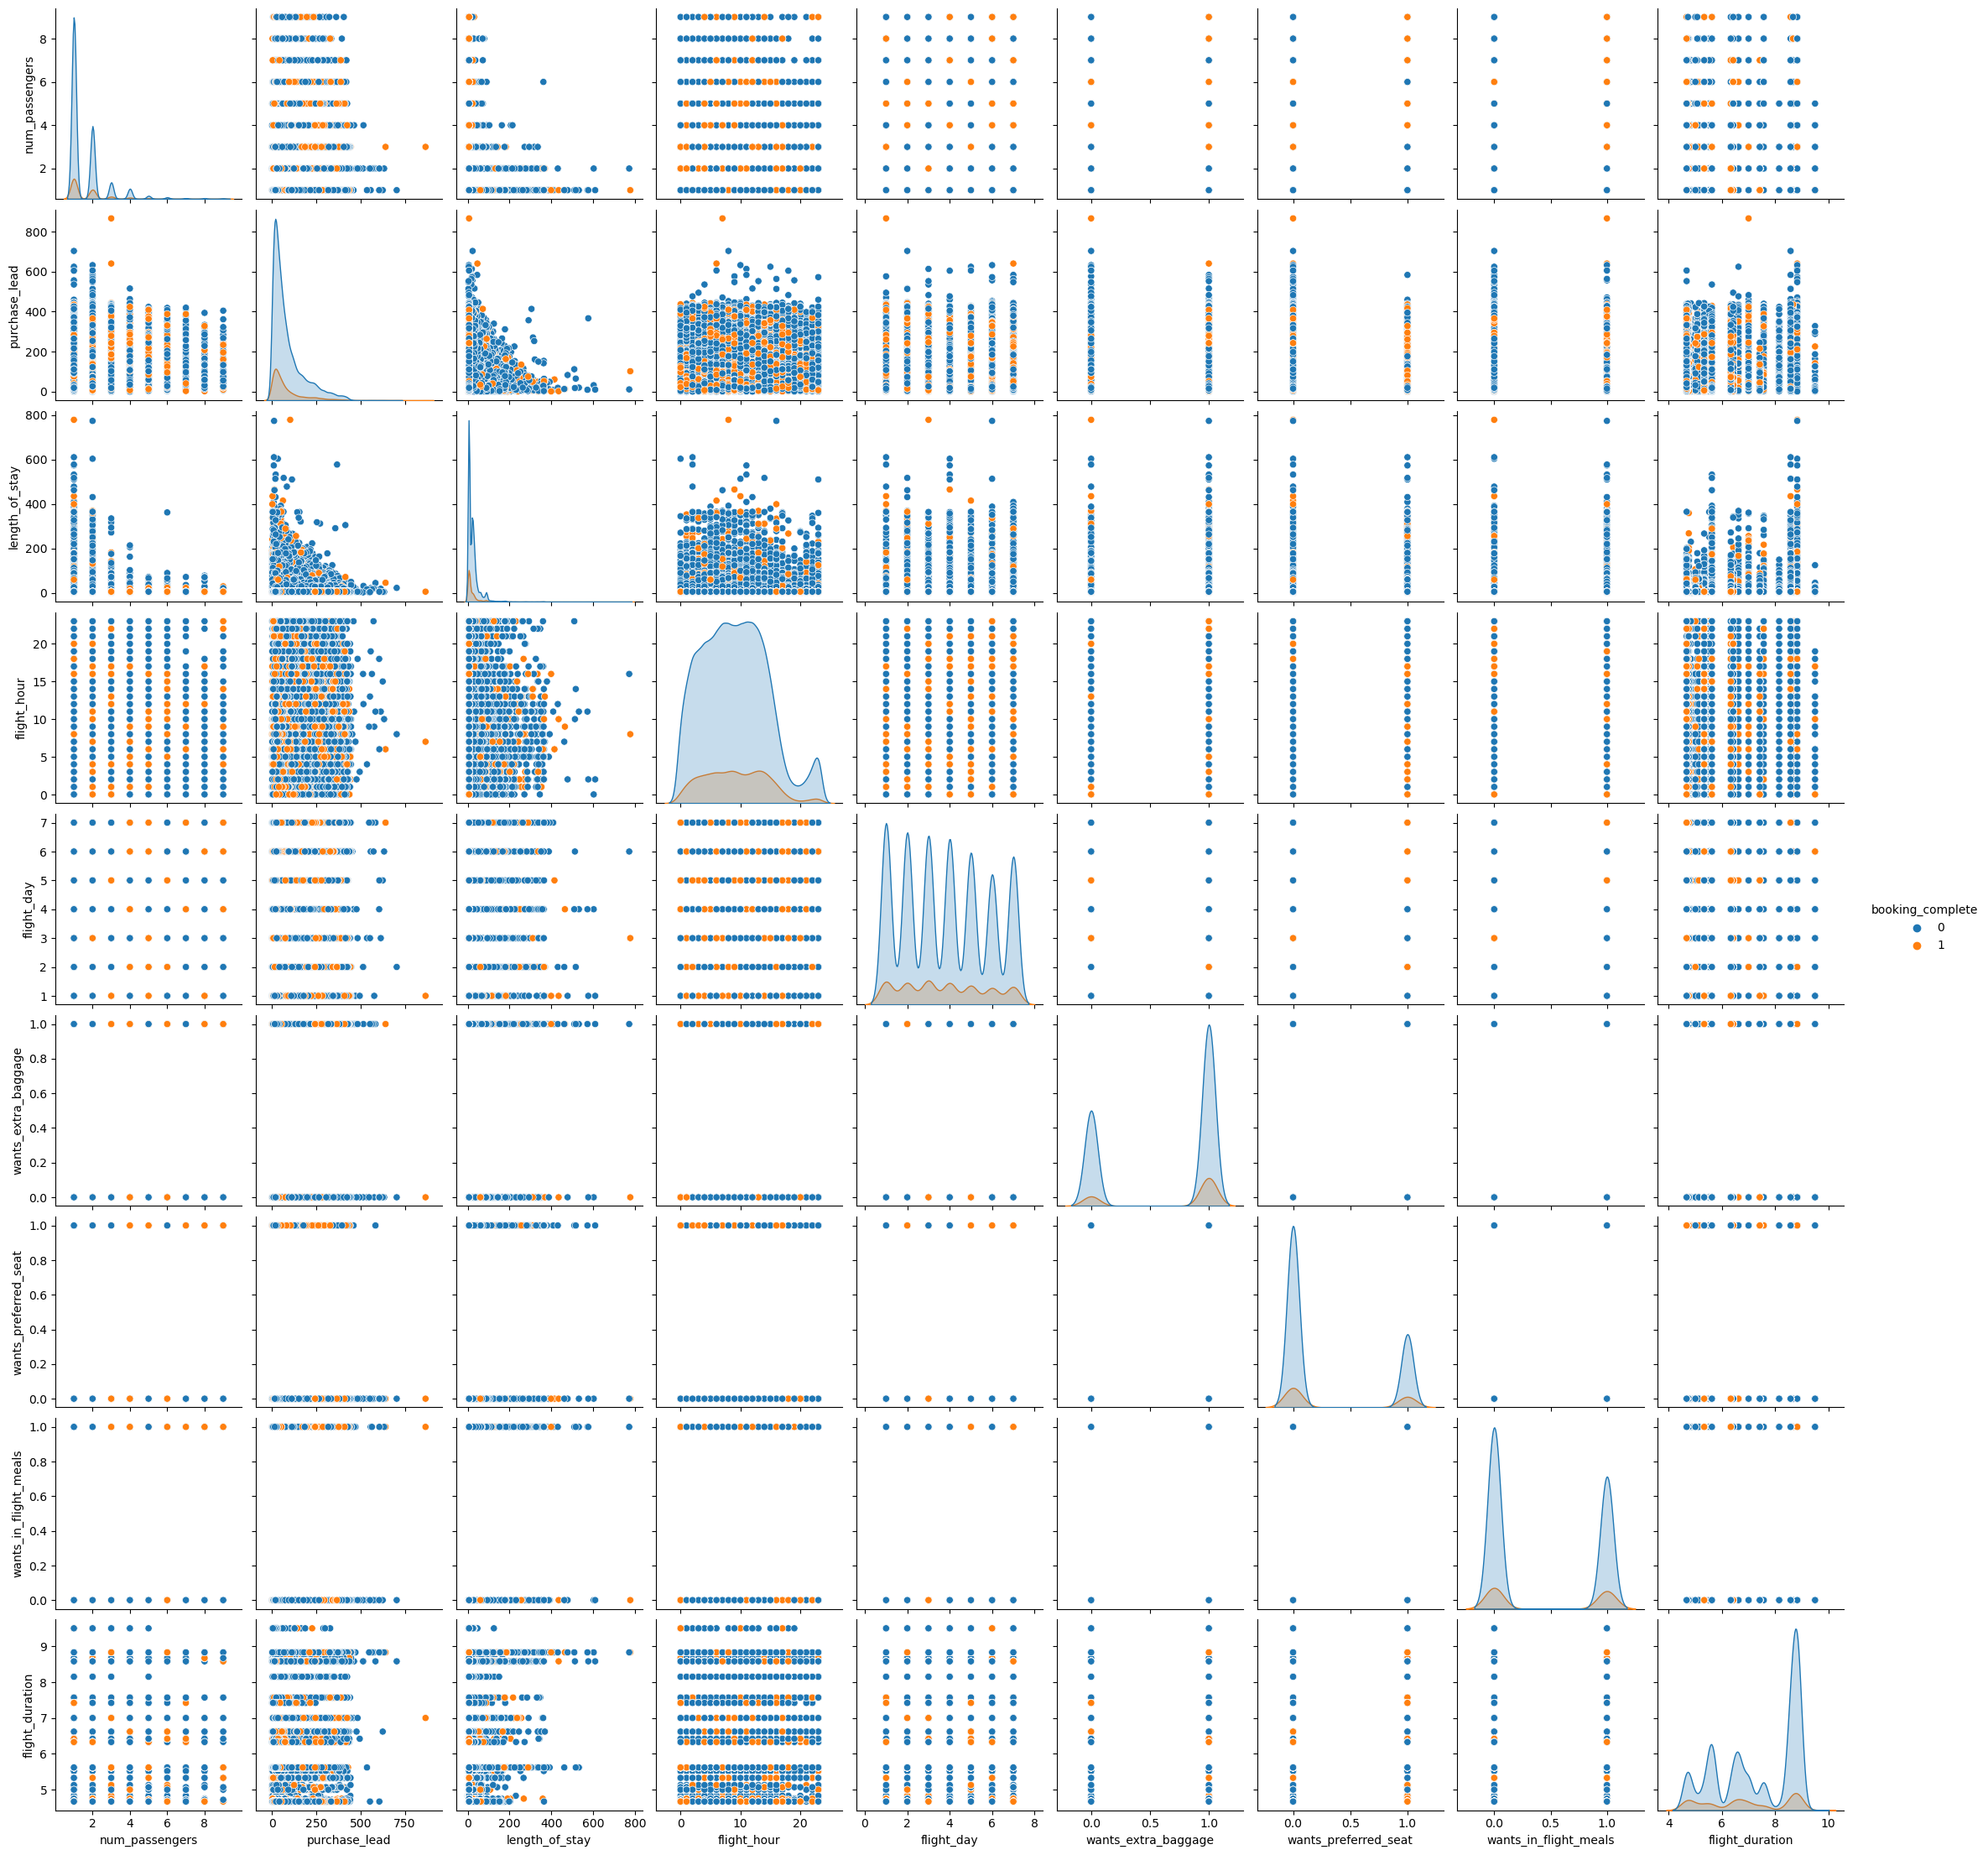

In [14]:
sns.pairplot(df, hue='booking_complete')
plt.show()


In [ ]:
# The pair plot shows the visualization of all variables

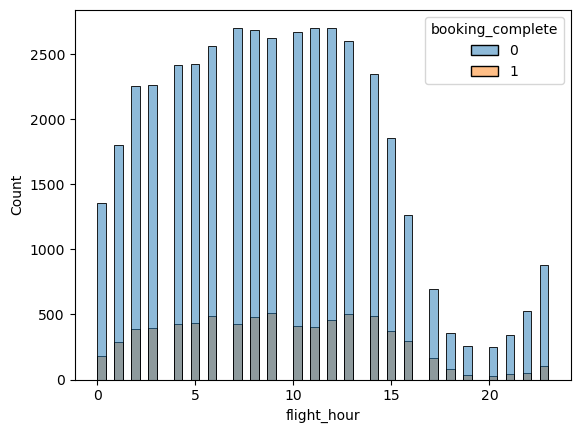

In [15]:
sns.histplot(x='flight_hour', hue='booking_complete', data=df)
plt.show()


In [ ]:
# The plot above shows the flight hour with respect to booking complete or booking incomplete.

In [16]:
# One-hot encode the categorical columns
cat_cols = ['sales_channel', 'trip_type', 'route', 'booking_origin']
df = pd.get_dummies(df, columns=cat_cols)

# Separate the target variable from the feature variables
X = df.drop('booking_complete', axis=1)
y = df['booking_complete']


In [ ]:
# Linear Regression Model

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, train_test_split

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameters for grid search
params = {'C': [0.1, 1, 10], 'penalty': ['l2', 'none']}

# Create grid search object
grid = GridSearchCV(LogisticRegression(max_iter=100, solver='lbfgs'), params, cv=5)

# Fit the grid search object to the data
grid.fit(X_train, y_train)


C:\Users\lutol\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lutol\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10], 'penalty': ['l2', 'none']})

In [18]:
# Get the best hyperparameters from the grid search
best_params = grid.best_params_

# Create a logistic regression model with the best hyperparameters
lr = LogisticRegression(max_iter=100, solver='lbfgs', **best_params)

# Train the model
lr.fit(X_train, y_train)

# Evaluate the model
y_pred = lr.predict(X_test)

# Calculate accuracy score
lr_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy score:", lr_accuracy)

Accuracy score: 0.8526


C:\Users\lutol\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Randon Forest Classifier Model

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, train_test_split

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define parameter grid
param_grid = {
    'n_estimators': [20],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

# Create random forest classifier
rf = RandomForestClassifier(random_state=42)

# Create grid search object
grid_search = GridSearchCV(rf, param_grid=param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 10], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5], 'n_estimators': [20]})

In [20]:
# Get the best estimator from the grid search
best_rf = grid_search.best_estimator_

# Train the model using the best estimator
best_rf.fit(X_train, y_train)

# Make predictions
y_pred = best_rf.predict(X_test)

# Calculate accuracy score
rf_accuracy = accuracy_score(y_test, y_pred)
print(rf_accuracy)


0.8522666666666666


In [ ]:
# Gradient Boosting Classifier Model

In [21]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create gradient boosting classifier
gb = GradientBoostingClassifier(random_state=42)

# Define the hyperparameters to search through
param_grid = {
    'n_estimators': [20],   # number of decision trees
}

# Set up GridSearchCV with 5-fold cross-validation
gb_cv = GridSearchCV(gb, param_grid, cv=5)



In [22]:
# Fit the GridSearchCV object on the training data to find the best parameters
gb_cv.fit(X_train, y_train)

# Print the best parameters found by the GridSearchCV object
print("Best parameters found: ", gb_cv.best_params_)

# Use the best estimator found by GridSearchCV to make predictions on the test set
y_pred = gb_cv.best_estimator_.predict(X_test)

# Calculate the accuracy score of the best estimator on the test set
gb_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy score: ", gb_accuracy)

Best parameters found:  {'n_estimators': 20}
Accuracy score:  0.852


In [ ]:
# Model Optimization

In [23]:
!pip install xgboost

In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Assuming X is your feature matrix and y is your target variable
# X_train and y_train are your training data

# Logistic Regression
lr = LogisticRegression()
lr_scores = cross_val_score(lr, X_train, y_train, cv=5)
print("Logistic Regression Cross Validation Scores:", lr_scores)

# Random Forest
rf = RandomForestClassifier()
rf_scores = cross_val_score(rf, X_train, y_train, cv=5)
print("Random Forest Cross Validation Scores:", rf_scores)

# XGBoost
xgb = XGBClassifier()
xgb_scores = cross_val_score(xgb, X_train, y_train, cv=5)
print("XGBoost Cross Validation Scores:", xgb_scores)


C:\Users\lutol\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lutol\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

Logistic Regression Cross Validation Scores: [0.847   0.8505  0.85    0.84675 0.85075]
Random Forest Cross Validation Scores: [0.84825  0.849625 0.848375 0.846125 0.856375]
XGBoost Cross Validation Scores: [0.847625 0.854375 0.852875 0.84625  0.85225 ]


In [ ]:
# Algorithm Comparison 

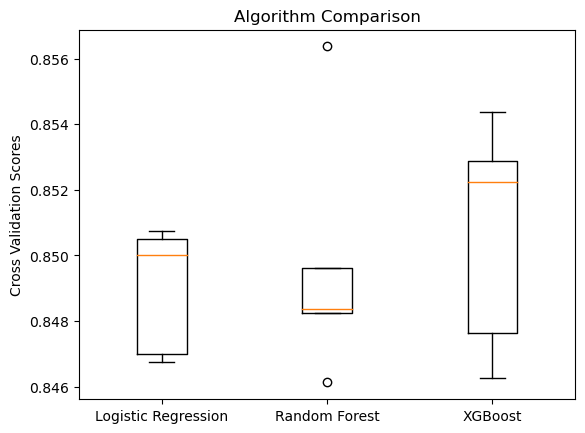

In [25]:
import matplotlib.pyplot as plt

# Creating variable for lr_scores, rf_scores, and xgb_scores as arrays of cross-validation scores
scores = [lr_scores, rf_scores, xgb_scores]

# Create a figure and axis object
fig, ax = plt.subplots()

# Create the boxplot
bp = ax.boxplot(scores)

# Set the labels and title
ax.set_xticklabels(['Logistic Regression', 'Random Forest', 'XGBoost'])
ax.set_ylabel('Cross Validation Scores')
ax.set_title('Algorithm Comparison')

# Show the plot
plt.show()


In [ ]:
# The Logistic Regression performed best considering the Spread of the Variables as the RF is too small and XGBoost too large
# The LR has a high CV score median as well as the XGBoost but the RF had a relatively low median.
# Also the LR had short whiskers showing minimal variability, while the RF had outliers and the XGBoost large wisker.

C:\Users\lutol\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lutol\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

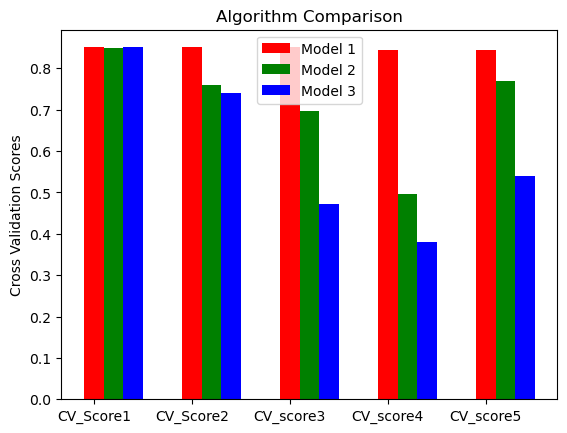

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

lr_scores = cross_val_score(lr, X, y, cv=5)
rf_scores = cross_val_score(rf, X, y, cv=5)
xgb_scores = cross_val_score(xgb, X, y, cv=5)


# Define color for each score
colors = ['r', 'g', 'b']

# Create figure and axis objects
fig, ax = plt.subplots()

# Create bar chart
for i, score in enumerate([lr_scores, rf_scores, xgb_scores]):
    ax.bar(np.arange(len(score))+i*0.2, score, color=colors[i], width=0.2, label=f'Model {i+1}')

# Set the x-axis tick labels
ax.set_xticks(np.arange(len(lr_scores)))
ax.set_xticklabels(['CV_Score1', 'CV_Score2', 'CV_score3','CV_score4','CV_score5'])

# Set the labels and title
ax.set_ylabel('Cross Validation Scores')
ax.set_title('Algorithm Comparison')

# Add legend
ax.legend()

# Show the plot
plt.show()



In [ ]:
# This plot further explains the performance of each model with the Logistic Regression the best of all 3 models

In [ ]:
# Created by Tola Abrahams. Tom4tech8@gmail.com 